## ANALISI INIZIALE LIVELLO IDROMETRICO


Inizialmente si è voluta formulare la media del livello idrometrico della città di Bari nelle 24, 48 e 72 ore.

In [1]:
import pandas as pd

df = pd.read_csv("BARI_24.csv", delimiter=";")

df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].str.replace(',', '.')
df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
media_Bari24 = df['LIVELLO IDROMETRICO'].mean()

print("Il livello idrometrico medio di Bari nelle 24H è " + str(media_Bari24.__round__(3)))

Il livello idrometrico medio di Bari nelle 24H è -0.17


In [2]:
import pandas as pd

df = pd.read_csv("BARI_48.csv", delimiter=";")

df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].str.replace(',', '.')
df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
media_Bari48 = df['LIVELLO IDROMETRICO'].mean()

print("Il livello idrometrico medio di Bari nelle 48H è " + str(media_Bari48.__round__(3)))

Il livello idrometrico medio di Bari nelle 48H è -0.189


In [3]:
import pandas as pd

df = pd.read_csv("BARI_72.csv", delimiter=";")

df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].str.replace(',', '.')
df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
media_Bari72 = df['LIVELLO IDROMETRICO'].mean()

print("Il livello idrometrico medio di Bari nelle 72H è " + str(media_Bari72.__round__(3)))

Il livello idrometrico medio di Bari nelle 72H è -0.183


Successivamente è sorta la necessità di analizzare i dataSet di più città appartenenti al Mar Adriatico, nell'arco temporale prima descritto. I DataSet scaricati dal sito dell'ISPRA si presentavano così:

In [2]:
import pandas as pd
df_ini = pd.read_csv("OTRANTO_24.csv", delimiter = ';')
df_ini

,DATA,ORA,LIVELLO IDROMETRICO,TEMPERATURA ARIA,UMIDITÀ RELATIVA,PRESSIONE ATMOSFERICA,DIREZIONE VENTO,VELOCITÀ VENTO
0,2025-02-02,08:50,"-0,343",NaN,NaN,NaN,78,"5,4"
1,2025-02-02,09:00,"-0,321","13,9",87.0,"1019,7",70,"4,6"
2,2025-02-02,09:10,"-0,317",NaN,NaN,NaN,66,"5,2"
3,2025-02-02,09:20,"-0,346",NaN,NaN,NaN,66,"4,6"
4,2025-02-02,09:30,"-0,355",NaN,NaN,NaN,80,"5,7"
...,...,...,...,...,...,...,...,...
138,2025-02-03,07:50,"-0,237",NaN,NaN,NaN,123,"1,9"
139,2025-02-03,08:00,"-0,223","15,5",92.0,1016,146,"2,1"
140,2025-02-03,08:10,"-0,253",NaN,NaN,NaN,141,"1,9"
141,2025-02-03,08:20,"-0,253",NaN,NaN,NaN,149,"1,9"


Continuando abbiamo pulito i DataSet dei dati che non servivano per la nostra analisi, e si è arrivati ad un risultato di questo tipo, unendo i dataSet delle diverse città:

In [15]:
import pandas as pd

def calcola_media_idrometrica(citta):
    intervalli = ["24", "48", "72"]
    risultati = {}
    
    for c in citta:
        risultati[c] = {}
        for intervallo in intervalli:
            file_name = f"{c.upper()}_{intervallo}.csv"
            df = pd.read_csv(file_name, delimiter=";")
            df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
            df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
            media = df['LIVELLO IDROMETRICO'].mean()
            risultati[c][f"{intervallo}H"] = round(media, 3)
    return risultati



citta = ["bari", "vieste", "otranto", "venezia", "trieste", "ravenna", "tremiti"]
risultati_media = calcola_media_idrometrica(citta)
#print(risultati_media)

media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['CITTA'] = media_df['CITTA'].str.capitalize() 
media_df.index = media_df.index + 1

media_df



,CITTA,24H,48H,72H
1,Bari,-0.170,-0.189,-0.183
2,Vieste,-0.089,-0.118,-0.111
3,Otranto,-0.269,-0.288,-0.279
4,Venezia,0.170,0.148,0.152
5,Trieste,0.006,-0.045,-0.041
6,Ravenna,-0.031,-0.056,-0.050
7,Tremiti,-0.050,-0.088,-0.079


Con un Istogramma abbiamo rappresentato sull'asse x le città, sulle y il dislivello marino, riuscendo ad ottenere una visione chiara e grafica della situazione delle stazioni costiere sull'Adriatico

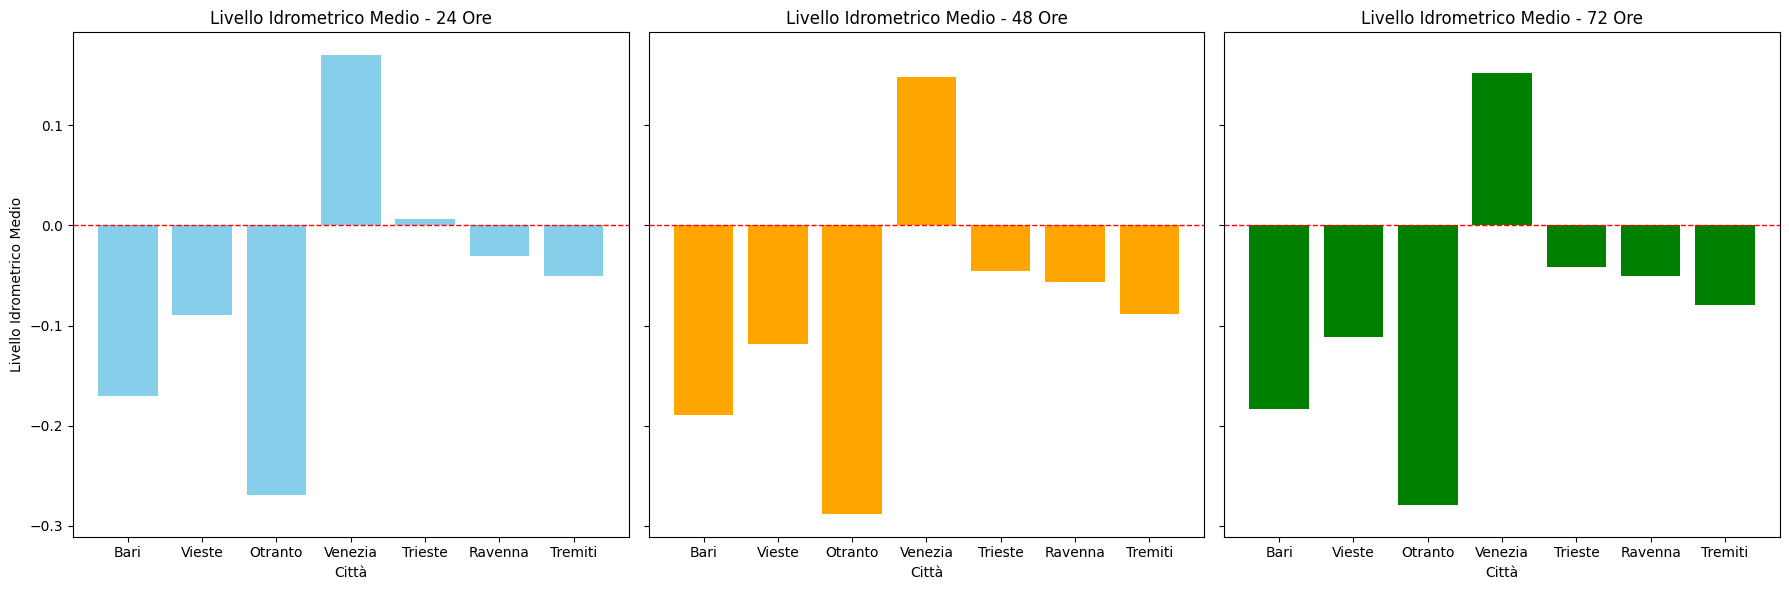

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axs[0].bar(media_df['CITTA'], media_df['24H'], color='skyblue')
axs[0].set_title('Livello Idrometrico Medio - 24 Ore')
axs[0].set_xlabel('Città')
axs[0].set_ylabel('Livello Idrometrico Medio')
axs[0].axhline(0, color='red', linestyle='--', linewidth=1)


axs[1].bar(media_df['CITTA'], media_df['48H'], color='orange')
axs[1].set_title('Livello Idrometrico Medio - 48 Ore')
axs[1].set_xlabel('Città')
axs[1].axhline(0, color='red', linestyle='--', linewidth=1)


axs[2].bar(media_df['CITTA'], media_df['72H'], color='green')
axs[2].set_title('Livello Idrometrico Medio - 72 Ore')
axs[2].set_xlabel('Città')
axs[2].axhline(0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


Inizialmente con una ricerca si evince che:

In [17]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="corrado_simone@gmail.com")

def get_latitude(citta):
    location = geolocator.geocode(f"{citta}, Italy")
    return location.latitude 

print("""Il Mar Adriatico si estende tra 39°N e 46°N di latitudine. Possiamo suddividerlo in:
Nord Adriatico: Sopra i 44°N
Centro Adriatico: Tra 42°N e 44°N
Sud Adriatico: Sotto i 42°N""")

def classify_region(latitude):
    if latitude > 44.0:
        return "NORD"
    elif latitude <= 44.0 and latitude > 42.0:
        return "CENTRO"
    else:
        return "SUD"

def get_area_geografica(citta):
    latitude = get_latitude(citta)
    if latitude:
        return classify_region(latitude)
    

citta = ["bari", "vieste", "otranto", "venezia", "trieste", "ravenna", "tremiti"]
risultati_media = calcola_media_idrometrica(citta)

media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['AREA GEOGRAFICA'] = media_df['CITTA'].apply(get_area_geografica)

media_df = media_df[['CITTA', 'AREA GEOGRAFICA', '24H', '48H', '72H']]
media_df['CITTA'] = media_df['CITTA'].str.capitalize()
media_df.index = media_df.index + 1

media_df['24H'] = media_df['24H'].round(3).astype(str) + " m"
media_df['48H'] = media_df['48H'].round(3).astype(str) + " m"
media_df['72H'] = media_df['72H'].round(3).astype(str) + " m"



media_df

Il Mar Adriatico si estende tra 39°N e 46°N di latitudine. Possiamo suddividerlo in:
Nord Adriatico: Sopra i 44°N
Centro Adriatico: Tra 42°N e 44°N
Sud Adriatico: Sotto i 42°N


,CITTA,AREA GEOGRAFICA,24H,48H,72H
1,Bari,SUD,-0.17 m,-0.189 m,-0.183 m
2,Vieste,SUD,-0.089 m,-0.118 m,-0.111 m
3,Otranto,SUD,-0.269 m,-0.288 m,-0.279 m
4,Venezia,NORD,0.17 m,0.148 m,0.152 m
5,Trieste,NORD,0.006 m,-0.045 m,-0.041 m
6,Ravenna,NORD,-0.031 m,-0.056 m,-0.05 m
7,Tremiti,CENTRO,-0.05 m,-0.088 m,-0.079 m


In [11]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="corrado_simone@gmail.com")

def get_latitude(citta):
    location = geolocator.geocode(f"{citta}, Italy")
    return location.latitude 

print("""Il Mar Adriatico si estende tra 39°N e 46°N di latitudine. Possiamo suddividerlo in:
Nord Adriatico: Sopra i 44°N
Centro Adriatico: Tra 42°N e 44°N
Sud Adriatico: Sotto i 42°N""")

def classify_region(latitude):
    if latitude > 44.0:
        return "NORD"
    elif latitude <= 44.0 and latitude > 42.0:
        return "CENTRO"
    else:
        return "SUD"

def get_area_geografica(citta):
    latitude = get_latitude(citta)
    if latitude:
        return classify_region(latitude)
    

citta = ["bari", "vieste", "otranto", "venezia", "trieste", "ravenna", "tremiti"]
risultati_media = calcola_media_idrometrica(citta)

media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['AREA GEOGRAFICA'] = media_df['CITTA'].apply(get_area_geografica)

media_df = media_df[['CITTA', 'AREA GEOGRAFICA', '24H', '48H', '72H']]
media_df['CITTA'] = media_df['CITTA'].str.capitalize()
media_df.index = media_df.index + 1


media_df


Il Mar Adriatico si estende tra 39°N e 46°N di latitudine. Possiamo suddividerlo in:
Nord Adriatico: Sopra i 44°N
Centro Adriatico: Tra 42°N e 44°N
Sud Adriatico: Sotto i 42°N


,CITTA,AREA GEOGRAFICA,24H,48H,72H
1,Bari,SUD,-0.170,-0.189,-0.183
2,Vieste,SUD,-0.089,-0.118,-0.111
3,Otranto,SUD,-0.269,-0.288,-0.279
4,Venezia,NORD,0.170,0.148,0.152
5,Trieste,NORD,0.006,-0.045,-0.041
6,Ravenna,NORD,-0.031,-0.056,-0.050
7,Tremiti,CENTRO,-0.050,-0.088,-0.079


Abbiamo quindi voluto rappresentare anche stavolta con un Istogramma, il livello medio marino sull'asse y, sull'asse x invece abbiamo raggruppato le diverse città in Nord, Centro e Sud.

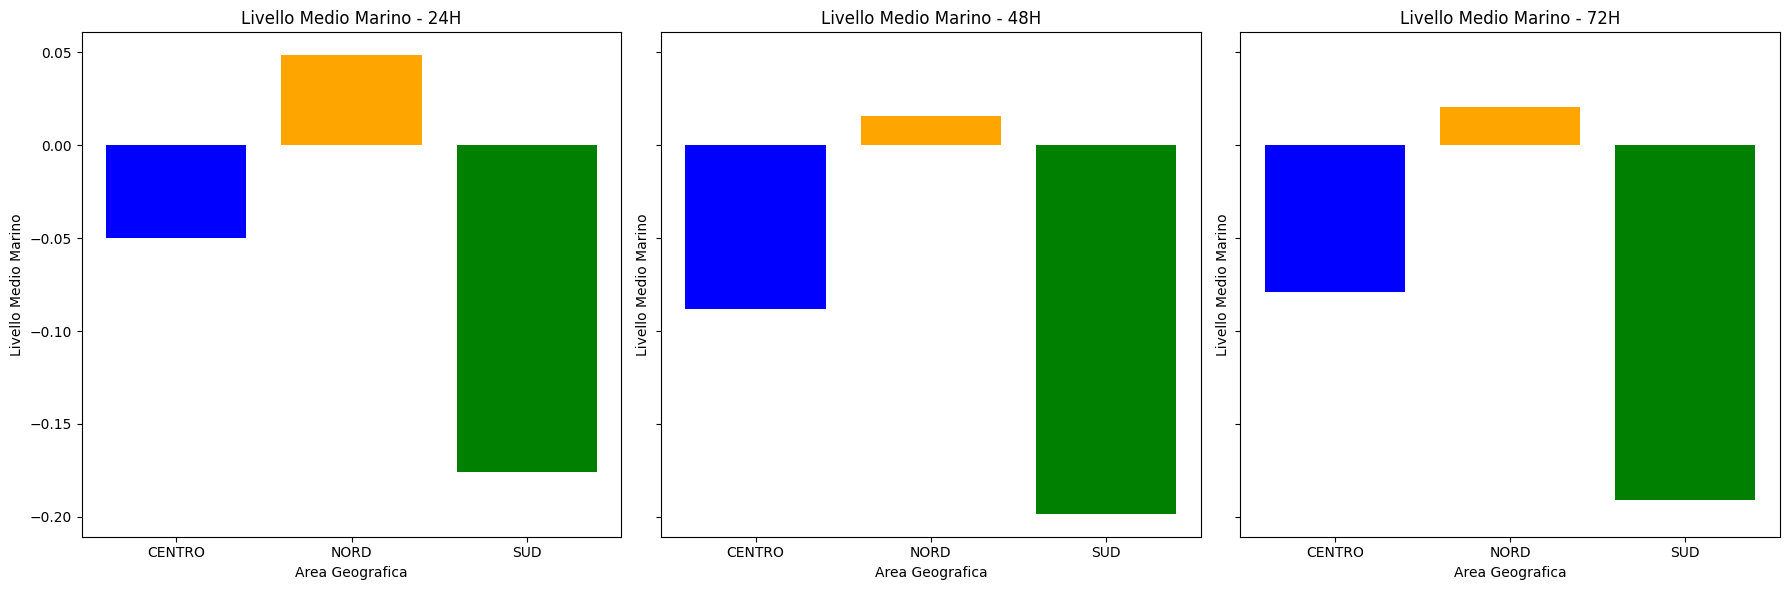

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

def crea_istogramma_area(media_df, axs, periodo, idx):
    media_df_area = media_df.groupby('AREA GEOGRAFICA')[periodo].mean().reset_index()
    axs[idx].bar(media_df_area['AREA GEOGRAFICA'], media_df_area[periodo], color=['blue', 'orange', 'green'])
    axs[idx].set_title(f'Livello Medio Marino - {periodo}')
    axs[idx].set_xlabel('Area Geografica')
    axs[idx].set_ylabel('Livello Medio Marino')


fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

crea_istogramma_area(media_df, axs, '24H', 0)
crea_istogramma_area(media_df, axs, '48H', 1)
crea_istogramma_area(media_df, axs, '72H', 2)

plt.tight_layout()
plt.show()


Successivamente abbiamo pensato di automatizzare il processo di raggruppamento in zone dell'adriatico, sfruttando due file esterni rispetto ai dizionari interni di Python:
- Il primo è un file Json che popola dinamicamente latitudine e longitudine di ogni città,
- Il secondo è un file csv che invece determina il basso, centro, e alto adriatico in base alla latitudine.
Vien chiaro quindi che ad essere confrontati erano la latitudine delle città prese in considerazione e la latitudine delle diverse zone dell'Adriatico.

In [131]:
import json
import pandas as pd

def calcola_media_idrometrica(citta):
    intervalli = ["24", "48", "72"]
    risultati = {}
    
    for c in citta:
        risultati[c] = {}
        for intervallo in intervalli:
            file_name = f"{c.upper()}_{intervallo}.csv"
            df = pd.read_csv(file_name, delimiter=";")
            df['LIVELLO IDROMETRICO'] = df['LIVELLO IDROMETRICO'].astype(str).str.replace(',', '.')
            df['LIVELLO IDROMETRICO'] = pd.to_numeric(df['LIVELLO IDROMETRICO'], errors='coerce')
            media = df['LIVELLO IDROMETRICO'].mean()
            risultati[c][f"{intervallo}H"] = round(media, 3)
    return risultati


citta = ["bari", "vieste", "otranto", "venezia", "trieste", "ravenna", "tremiti"]
risultati_media = calcola_media_idrometrica(citta)


media_df = pd.DataFrame.from_dict(risultati_media, orient='index').reset_index()
media_df.columns = ['CITTA', '24H', '48H', '72H']

media_df['24H'] = media_df['24H'].round(3).astype(str) + " m"
media_df['48H'] = media_df['48H'].round(3).astype(str) + " m"
media_df['72H'] = media_df['72H'].round(3).astype(str) + " m"
media_df['CITTA'] = media_df['CITTA'].str.capitalize() 
media_df.index = media_df.index + 1

with open('italy_geo.json', 'r', encoding='utf-8') as f:
    geo_data = json.load(f)


geo_df = pd.DataFrame(geo_data)


geo_df['comune'] = geo_df['comune'].str.capitalize()


merged_df = media_df.merge(geo_df, 
                            left_on='CITTA', 
                            right_on='comune', 
                            how='left')




final_df = merged_df[['CITTA', '24H', '48H', '72H', 'lng', 'lat']]


final_df.index = final_df.index + 1
temp_df = final_df 
final_df 


,CITTA,24H,48H,72H,lng,lat
1,Bari,-0.17 m,-0.189 m,-0.183 m,16.86737016,41.12559562
2,Vieste,-0.089 m,-0.118 m,-0.111 m,16.18063171,41.88161463
3,Otranto,-0.269 m,-0.288 m,-0.279 m,18.49113602,40.14635263
4,Venezia,0.17 m,0.148 m,0.152 m,12.33845214,45.43490484
5,Trieste,0.006 m,-0.045 m,-0.041 m,13.7681366,45.6494354
6,Ravenna,-0.031 m,-0.056 m,-0.05 m,12.19913937,44.41722492
7,Tremiti,-0.05 m,-0.088 m,-0.079 m,15.50437208,42.12042295


In [94]:
def dd_to_dms(degrees, is_latitude=True):
    degrees = float(degrees) 
    direction = 'N' if is_latitude and degrees >= 0 else 'S' if is_latitude else 'E' if degrees >= 0 else 'W'
    degrees = abs(degrees)
    d = int(degrees)
    m = int((degrees - d) * 60)
    s = round((degrees - d - m / 60) * 3600, 2)
    return f"{d}° {m}' {s}'' {direction}"


temp_df.loc[:, 'lng'] = temp_df['lng'].apply(dd_to_dms)
temp_df.loc[:, 'lat'] = temp_df['lat'].apply(dd_to_dms)

temp_df

,CITTA,24H,48H,72H,lng,lat
1,Bari,-0.17 m,-0.189 m,-0.183 m,16° 52' 2.53'' N,41° 7' 32.14'' N
2,Vieste,-0.089 m,-0.118 m,-0.111 m,16° 10' 50.27'' N,41° 52' 53.81'' N
3,Otranto,-0.269 m,-0.288 m,-0.279 m,18° 29' 28.09'' N,40° 8' 46.87'' N
4,Venezia,0.17 m,0.148 m,0.152 m,12° 20' 18.43'' N,45° 26' 5.66'' N
5,Trieste,0.006 m,-0.045 m,-0.041 m,13° 46' 5.29'' N,45° 38' 57.97'' N
6,Ravenna,-0.031 m,-0.056 m,-0.05 m,12° 11' 56.9'' N,44° 25' 2.01'' N
7,Tremiti,-0.05 m,-0.088 m,-0.079 m,15° 30' 15.74'' N,42° 7' 13.52'' N


In [122]:
maritime_zones_df = pd.read_csv('suddivisione_mare_adriatico_latitudine.csv')
maritime_zones_df.index = maritime_zones_df.index + 1
temp_df = maritime_zones_df
maritime_zones_df


,Latitudine_min,Latitudine_max,Mare
1,45.8,44.5,Mar Adriatico Settentrionale
2,44.5,42.5,Mar Adriatico Centrale
3,42.5,40.0,Mar Adriatico Meridionale


In [123]:
def dd_to_dms(degrees, is_latitude=True):
    degrees = float(degrees) 
    direction = 'N' if is_latitude and degrees >= 0 else 'S' if is_latitude else 'E' if degrees >= 0 else 'W'
    degrees = abs(degrees)
    d = int(degrees)
    m = int((degrees - d) * 60)
    s = round((degrees - d - m / 60) * 3600, 2)
    return f"{d}° {m}' {s}'' {direction}"


temp_df.loc[:, 'Latitudine_min'] = temp_df['Latitudine_min'].apply(dd_to_dms)
temp_df.loc[:, 'Latitudine_max'] = temp_df['Latitudine_max'].apply(dd_to_dms)

temp_df

C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_9996\26446148.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '["45° 47' 60.0'' N" "44° 30' 0.0'' N" "42° 30' 0.0'' N"]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp_df.loc[:, 'Latitudine_min'] = temp_df['Latitudine_min'].apply(dd_to_dms)
C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_9996\26446148.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '["44° 30' 0.0'' N" "42° 30' 0.0'' N" "40° 0' 0.0'' N"]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  temp_df.loc[:, 'Latitudine_max'] = temp_df['Latitudine_max'].apply(dd_to_dms)


,Latitudine_min,Latitudine_max,Mare
1,45° 47' 60.0'' N,44° 30' 0.0'' N,Mar Adriatico Settentrionale
2,44° 30' 0.0'' N,42° 30' 0.0'' N,Mar Adriatico Centrale
3,42° 30' 0.0'' N,40° 0' 0.0'' N,Mar Adriatico Meridionale


Arrivando infine a questa tabella:

In [132]:
maritime_zones_df = pd.read_csv('suddivisione_mare_adriatico_latitudine.csv')
maritime_zones_df['Latitudine_min'] = pd.to_numeric(maritime_zones_df['Latitudine_min'])
maritime_zones_df['Latitudine_max'] = pd.to_numeric(maritime_zones_df['Latitudine_max'])

def def_mare(latitudine):
    latitudine = float(latitudine) 
    for _, row in maritime_zones_df.iterrows():
        if row['Latitudine_min'] >= latitudine > row['Latitudine_max']:
            return row['Mare']
    return 'Non classificato'

if 'Mare' in final_df.columns:
    final_df = final_df.drop(columns=['Mare'])

final_df['Mare'] = final_df['lat'].apply(def_mare)

def dd_to_dms(degrees, is_latitude=True):
    degrees = float(degrees) 
    direction = 'N' if is_latitude and degrees >= 0 else 'S' if is_latitude else 'E' if degrees >= 0 else 'W'
    degrees = abs(degrees)
    d = int(degrees)
    m = int((degrees - d) * 60)
    s = round((degrees - d - m / 60) * 3600, 2)
    return f"{d}° {m}' {s}'' {direction}"

final_df.loc[:, 'lng'] = final_df['lng'].apply(dd_to_dms)
final_df.loc[:, 'lat'] = final_df['lat'].apply(dd_to_dms)
final_df

C:\Users\Giuseppe\AppData\Local\Temp\ipykernel_9996\2446816795.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Mare'] = final_df['lat'].apply(def_mare)


,CITTA,24H,48H,72H,lng,lat,Mare
1,Bari,-0.17 m,-0.189 m,-0.183 m,16° 52' 2.53'' N,41° 7' 32.14'' N,Mar Adriatico Meridionale
2,Vieste,-0.089 m,-0.118 m,-0.111 m,16° 10' 50.27'' N,41° 52' 53.81'' N,Mar Adriatico Meridionale
3,Otranto,-0.269 m,-0.288 m,-0.279 m,18° 29' 28.09'' N,40° 8' 46.87'' N,Mar Adriatico Meridionale
4,Venezia,0.17 m,0.148 m,0.152 m,12° 20' 18.43'' N,45° 26' 5.66'' N,Mar Adriatico Settentrionale
5,Trieste,0.006 m,-0.045 m,-0.041 m,13° 46' 5.29'' N,45° 38' 57.97'' N,Mar Adriatico Settentrionale
6,Ravenna,-0.031 m,-0.056 m,-0.05 m,12° 11' 56.9'' N,44° 25' 2.01'' N,Mar Adriatico Centrale
7,Tremiti,-0.05 m,-0.088 m,-0.079 m,15° 30' 15.74'' N,42° 7' 13.52'' N,Mar Adriatico Meridionale
